In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [2]:
x, y = make_classification(
    n_samples = 200,
    n_features = 2,
    n_redundant = 0,
    n_classes = 2,
    n_clusters_per_class = 1,
    random_state = 1024
)
x.shape, y.shape

((200, 2), (200,))

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state=233)

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
clf = LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

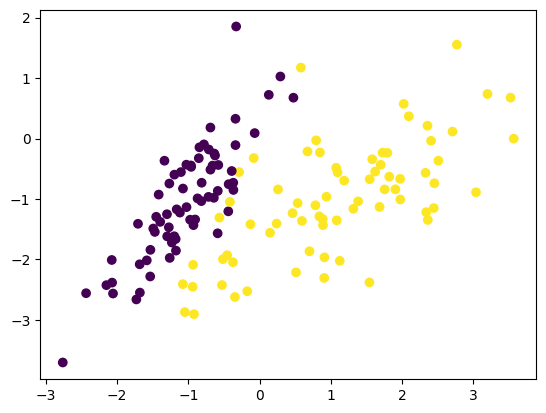

In [6]:
plt.scatter(x_train[:,0], x_train[:,1], c = y_train)

In [7]:
clf.coef_

array([[ 3.37543726, -1.81892238]])

In [8]:
clf.intercept_

array([-0.90007527])

In [11]:
clf.score(x_test,y_test)

0.9166666666666666

In [9]:
x1 = np.linspace(-4,4,1000)
x2 = (-clf.coef_[0][0] * x1 - clf.intercept_) / clf.coef_[0][1]

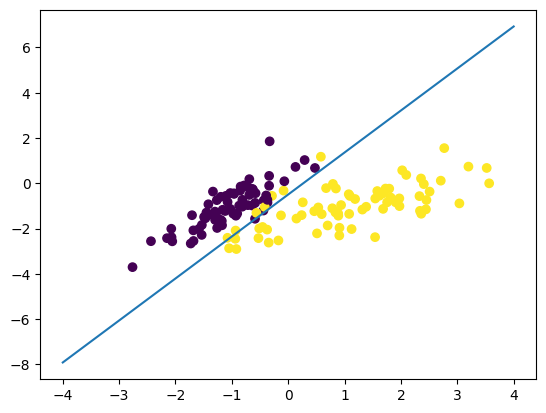

In [10]:
plt.scatter(x_train[:,0], x_train[:,1], c = y_train)
plt.plot(x1,x2)

### 多项式逻辑回归的决策边界

In [14]:
np.random.seed(0)
x = np.random.normal(0,1,size=(200,2))
y = np.array((x[:,0]**2) + (x[:,1]**2) < 2, dtype = 'int')

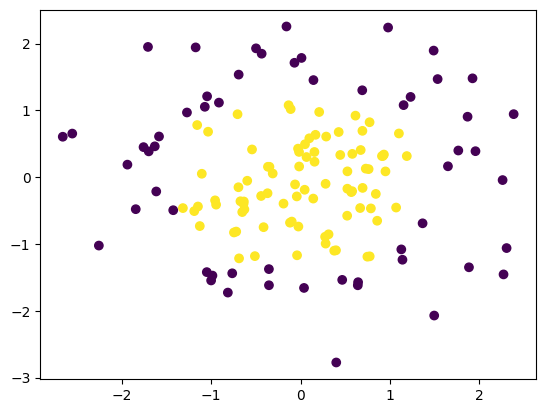

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state=233)
plt.scatter(x_train[:,0], x_train[:,1], c = y_train)

In [16]:
from sklearn.pipeline import Pipeline

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [18]:
clf_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('std_scaler', StandardScaler()),
    ('log_reg', LogisticRegression())
])

In [19]:
clf_pipe.fit(x_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression())])

In [20]:
def plot_decision_boundary(model, X, y, steps=1000, cmap='Paired'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, steps), np.linspace(y_min, y_max, steps))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

In [ ]:
plot_decision_boundary（）